<a href="https://colab.research.google.com/github/MariaLFreitas/Machine_learning/blob/main/L12_decision_trees_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pipeline com desicion tree 

In [ ]:
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


##Acessando base de dados

In [ ]:
bcancer = datasets.load_breast_cancer()

X = bcancer.data[:, [2, 3]]
y = bcancer.target
print('Class labels:', np.unique(y))
print(X)

Class labels: [0 1]
[[ 122.8  1001.  ]
 [ 132.9  1326.  ]
 [ 130.   1203.  ]
 ...
 [ 108.3   858.1 ]
 [ 140.1  1265.  ]
 [  47.92  181.  ]]


##Separando base me treinamento e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [212 357]
Labels counts in y_train: [170 285]
Labels counts in y_test: [42 72]


##Criando pipeline

In [ ]:
pipe = Pipeline([
        ('normalizador', StandardScaler()),
        ('redutor_dim', PCA()),
        ('classificador', DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('normalizador',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('redutor_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classificador',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=2,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                   

##Usando PCA

In [ ]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9122807017543859

In [ ]:
y_test_pre= pipe.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.9122807017543859

In [ ]:
y_train_pred = pipe.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9076923076923077

##Grid search

In [ ]:
param_grid = {
    'redutor_dim__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classificador__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__ccp_alpha': [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid= param_grid, scoring='accuracy' )

In [ ]:
grid.fit(X_train, y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_components=3 must be between 0 and min(n_s

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('normalizador',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('redutor_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classificador',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                              

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'classificador__ccp_alpha': 0.1, 'classificador__criterion': 'gini', 'classificador__max_depth': 3, 'redutor_dim__n_components': 2}
0.8725654996522143


In [ ]:
clf= grid.best_estimator_
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9122807017543859

##Predict de uma unica amostra

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test1 = X_test[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(114, 2)
(114,)
(2,)
()
(1, 2)
(1,)


In [ ]:
y_test1_pred  = grid.predict(X_test1)

y_test1_pred

array([0])

In [ ]:
accuracy_score(y_test1, y_test1_pred)

1.0

Dados obtidos da amostra: perimeter_mean e area_mean, respectivamente.

In [ ]:
X_test1

array([[108.8, 805.1]])

###2º teste para conferir

In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

X_test2 = X_test[2,:]
y_test2 = y_test[2]

print(np.shape(X_test2))
print(np.shape(y_test2))

X_test2 = np.reshape(X_test2,(1,-1))
y_test2 = np.reshape(y_test2,(1))

print(np.shape(X_test2))
print(np.shape(y_test2))

(114, 2)
(114,)
(2,)
()
(1, 2)
(1,)


In [ ]:
y_test2_pred  = grid.predict(X_test2)

y_test2_pred

array([1])

In [ ]:
accuracy_score(y_test2, y_test2_pred)

1.0

Dados obtidos da amostra: perimeter_mean e area_mean, respectivamente.

In [ ]:
X_test2

array([[ 74.87, 415.1 ]])

##Arvore de decisão

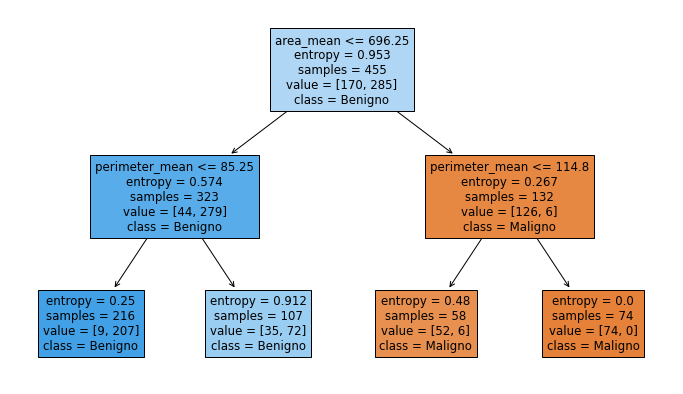

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtc.fit(X_train, y_train)

plt.figure(figsize=(12, 7))

plot_tree(dtc, filled=True, class_names=['Maligno','Benigno'],feature_names=['perimeter_mean','area_mean']) 

plt.show()

```
Se area_mean é menor ou igual a 696.25
  Confere o perimeter_mean mas independente da comparação:
    é benigno
Se area_mean é maior que 696.25
  Confere o perimeter_mean mas independente da comparação:
  é maligno
```
###Teste 1:
area_mean é de 805.1 que é maior que 696.25, logo vai para a direita,confere perimeter_mean, perimeter_mean é 108.8 é menor que 114.8, então vai para esquerda, é classificado como Maligno, que é correto pois 0 é maligno e o resultado obtido foi 0.


###Teste 2: 
area_mean é de 415.1 que é menor que 696.25, logo vai para a esquerda,confere perimeter_mean, perimeter_mean é 74.87 é menor que 85.25, então vai para esquerda, é classificado como Benigno, que é correto pois 1 é benigno e o resultado obtido foi 1.

